Build a regression model.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings



In [28]:
#read the saved data from previous notebook
combined_poi_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Combined_POI_data.csv', index_col=0)
combined_poi_df.head()

,category_alias,category_title,poi_name,poi_distance,poi_address,poi_rating,free_bikes,station_lat,station_long
0,mexican,Mexican,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
1,breakfast_brunch,Breakfast & Brunch,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
2,italian,Italian,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
3,latin,Latin American,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
4,bars,Bars,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781


In [29]:
# Drop rows where the 'poi_rating' column is null
analysis_df = combined_poi_df.dropna(subset=['poi_rating'])


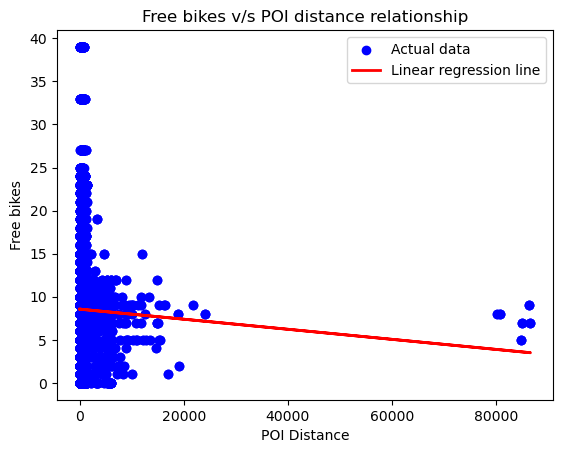

In [30]:
#first build a line plot to study relationship between free bikes in a station and the distance to POI from the bike station
x=analysis_df['poi_distance']
y=analysis_df['free_bikes']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('POI Distance')
plt.ylabel('Free bikes')
plt.title('Free bikes v/s POI distance relationship')
plt.legend()

# Show the plot
plt.show()

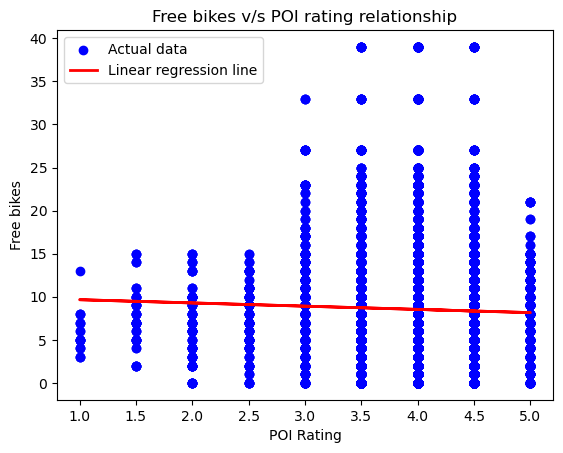

In [31]:
#plot a line plot to study relationship between free bikes in a station and rating of POI
x=analysis_df['poi_rating']
y=analysis_df['free_bikes']

# Reshape the data
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Actual data')

# Plot the linear regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Linear regression line')

# Add labels and a legend
plt.xlabel('POI Rating')
plt.ylabel('Free bikes')
plt.title('Free bikes v/s POI rating relationship')
plt.legend()

# Show the plot
plt.show()

In [32]:
#Building a linear regression model to check relationship between dependent variable "no. of free bikes" and POI rating
import statsmodels.api as sm

X= analysis_df
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['poi_rating'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:             free_bikes   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          3.371e+04
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:18:42   Log-Likelihood:                         -61679.
No. Observations:               18905   AIC:                                  1.234e+05
Df Residuals:                   18904   BIC:                                  1.234e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
#Building a linear regression model to check relationship between dependent variable "no. of free bikes" and distance to POI
import statsmodels.api as sm

X= analysis_df
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X['poi_distance'])

model = lin_reg.fit()
print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:             free_bikes   R-squared (uncentered):                   0.043
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              851.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                   3.44e-183
Time:                        16:19:00   Log-Likelihood:                         -70937.
No. Observations:               18905   AIC:                                  1.419e+05
Df Residuals:                   18904   BIC:                                  1.419e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [34]:
#next try multilinear regression to check impact of multiple independent variables to number of free bikes
import statsmodels.api as sm

X= analysis_df.drop(['free_bikes','category_alias','category_title','poi_address','poi_name'], axis=1)
y=analysis_df['free_bikes']
X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     99.78
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.40e-84
Time:                        16:19:39   Log-Likelihood:                -61150.
No. Observations:               18905   AIC:                         1.223e+05
Df Residuals:                   18900   BIC:                         1.223e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1708.0668    110.582     15.446   

Provide model output and an interpretation of the results. 

*The study of relationship between free bikes in a station and rating of POI indicates that the rating of POI has impact on the number of free bikes in a bike station. The number of free bikes in a station are lower for stations that have high rating for the points of interest in its vicinity.*

*With a lower regression coefficient, the study of relationship between free bikes in a station and distance from POI indicates that its a weak relationship. However, the study indicates that there are lesser bikes where POI is farther away perhaps because riders like to ride more to reach their POI*

# Stretch

How can you turn the regression model into a classification model?

In [36]:
#next try classification model to check impact of multiple independent variables to number of free bikes
#For logical analysis, first add a True or False column (binary variable) to the dataset. For my analysis, 
#I am going to add a column "low_on_bikes" with a value of True is free_bike count is 2 or below and False otherwise

analysis_df['low_on_bikes'] = np.where(analysis_df['free_bikes']<= 2, True, False)

analysis_df['low_on_bikes'].value_counts()

low_on_bikes
False    15185
True      3720
Name: count, dtype: int64

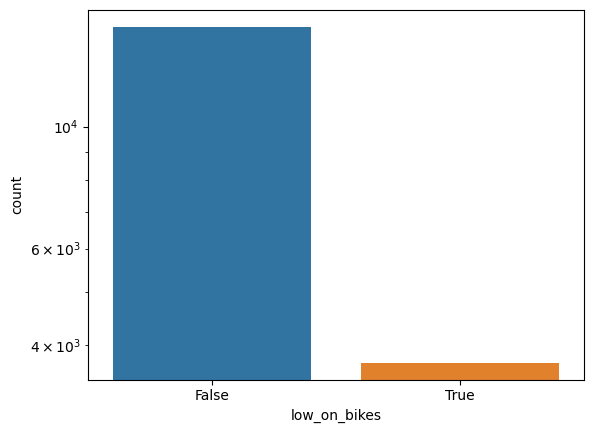

In [41]:
ax=sns.countplot(x='low_on_bikes',data=analysis_df);
ax.set_yscale('log')

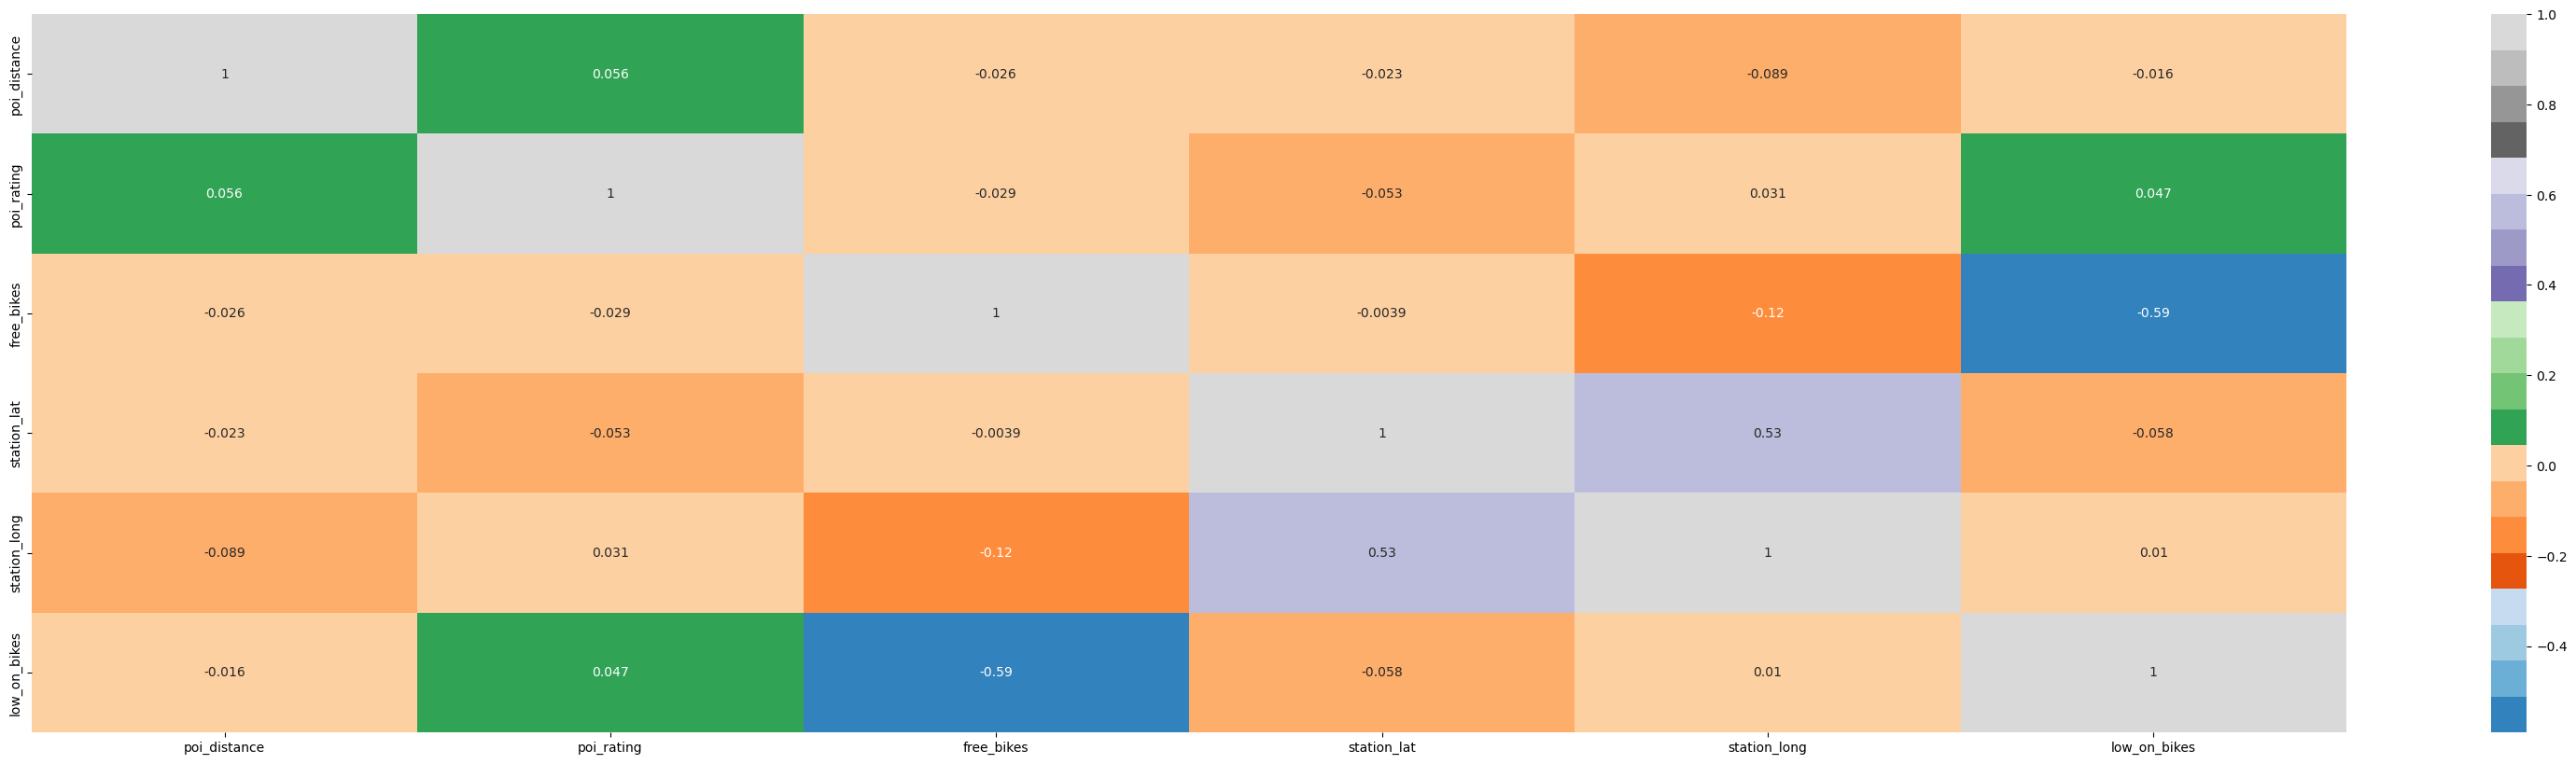

In [44]:
plt.figure(figsize = (40,10))
sns.heatmap(analysis_df.drop(['category_alias','category_title','poi_address','poi_name'], axis=1).corr(), annot = True, cmap="tab20c")
plt.show()

In [49]:
import statsmodels.api as sm

X= analysis_df.drop(['low_on_bikes','free_bikes','category_alias','category_title','poi_address','poi_name'], axis=1)
y=analysis_df['low_on_bikes']
X = sm.add_constant(X) # adding a constant
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()


Optimization terminated successfully.
         Current function value: 0.492014
         Iterations 8


In [50]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           low_on_bikes   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18900
Method:                           MLE   Df Model:                            4
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                0.007829
Time:                        19:12:39   Log-Likelihood:                -9301.5
converged:                       True   LL-Null:                       -9374.9
Covariance Type:            nonrobust   LLR p-value:                 9.947e-31
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -419.3451     45.065     -9.305      0.000    -507.671    -331.019
poi_distance -2.642e-05   1.27e-05     -2.081      0.037   -5.13e-05   -1.54e-06
poi_rating       0.2392      0.041      5.873      0.000       0.159       0.319
station_lat     -4.1649      0.431     -9.665      0.000      -5.010      -3.320
station_long     2.8545      0.509      5.604      0.000       1.856       3.853
================================================================================
"""

In [55]:
#perform backward elimination method

col=X.columns[:-1]
col


def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,analysis_df['low_on_bikes'],col)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           low_on_bikes   No. Observations:                18905
Model:                          Logit   Df Residuals:                    18902
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                0.005581
Time:                        19:16:37   Log-Likelihood:                -9322.6
converged:                       True   LL-Null:                       -9374.9
Covariance Type:            nonrobust   LLR p-value:                 1.888e-23
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -217.7389     28.059     -7.760      0.000    -272.734    -162.744
poi_rating      0.2430      0.040      6.038      0.000       0.164       0.322
station_lat    -3.0294      0.395     -7.673      0.000      -3.803      -2.256
===============================================================================
"""